Algorithm 1 from http://george-vogiatzis.org/publications/cvmp11_auto_obj_seg.pdf

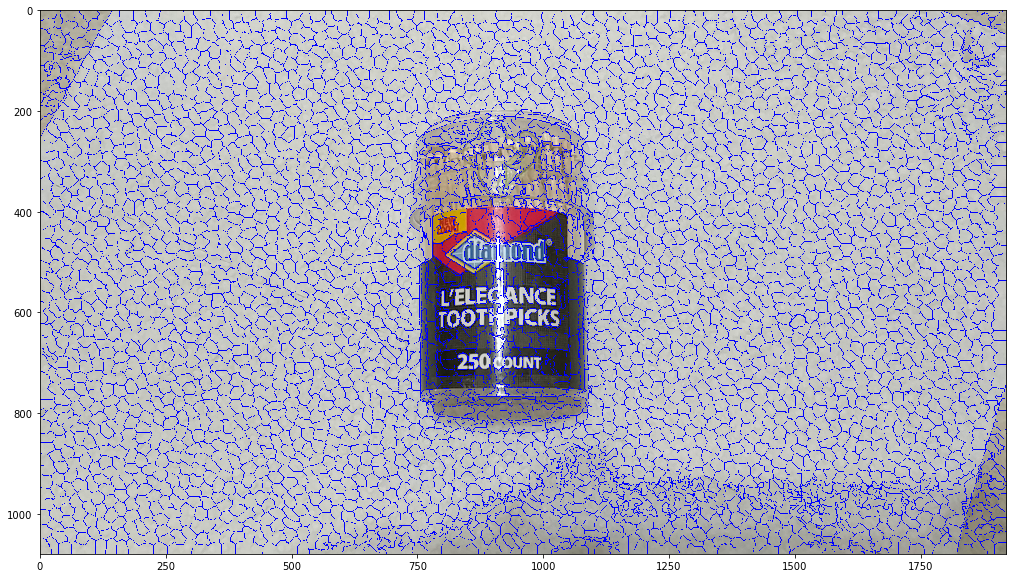

In [7]:
import cv2
import imutils
import imageio
import pylab as plt
import numpy as np
from ipywidgets import widgets, Checkbox, FloatSlider, IntSlider, IntRangeSlider, FloatRangeSlider, RadioButtons
from IPython.core.display import clear_output, display
from IPython.display import HTML

def adjust_superpixels(change=None):
    # Settings
    num_superpixels = slider_superpixels_i.value
    num_levels = slider_levels_i.value
    prior = 2
    num_histogram_bins = slider_histogram_bins_i.value
    num_iterations = slider_iterations_i.value
    clear_output(True)

    # Load images from video
    filename = 'toothpick.mp4'
    vid = imageio.get_reader(filename,  'ffmpeg')

    for i in range(1):
        image = vid.get_data(i)
        # Group pixels into superpixels
        height,width,channels = image.shape
        seeds = cv2.ximgproc.createSuperpixelSEEDS(width, height, channels,
                                                   num_superpixels, num_levels, prior, num_histogram_bins)
        color_img = np.zeros((height,width,3), np.uint8)
        color_img[:] = (0, 0, 255)
        seeds.iterate(image, num_iterations)
        labels = seeds.getLabels()

        # labels output: use the last x bits to determine the color
        num_label_bits = 2
        labels &= (1<<num_label_bits)-1
        labels *= 1<<(16-num_label_bits)

        mask = seeds.getLabelContourMask(False)

        # stitch foreground & background together
        mask_inv = cv2.bitwise_not(mask)
        result_bg = cv2.bitwise_and(image, image, mask=mask_inv)
        result_fg = cv2.bitwise_and(color_img, color_img, mask=mask)
        result = cv2.add(result_bg, result_fg)

        plt.figure(figsize=(20,10))
        plt.imshow(result)
    plt.show()

slider_superpixels_i = IntSlider(description='num superpixels', min=0, max=5000, step=10, value=4000)
slider_superpixels_i.observe(adjust_superpixels, 'value')

slider_levels_i = IntSlider(description='levels', min=0, max=20, step=1, value=4)
slider_levels_i.observe(adjust_superpixels, 'value')

slider_histogram_bins_i = IntSlider(description='histogram bins', min=0, max=10, step=1, value=7)
slider_histogram_bins_i.observe(adjust_superpixels, 'value')

slider_iterations_i = IntSlider(description='iterations', min=0, max=1000, step=1, value=520)
slider_iterations_i.observe(adjust_superpixels, 'value')

display(slider_superpixels_i, slider_levels_i, slider_histogram_bins_i, slider_iterations_i)
adjust_superpixels()